#  Задание 1

1. Какие гипотезы называются простыми, а какие сложными?

    * Простая гипотеза - тестируется равенство наблюдаемой выборки одному распределению. Альтернатива этому - сложная гипотеза

2. Чем отличаются параметрические критерии от непараметрических? В каких ситуациях можно использовать параметрические критерии, а в каких лучше использовать непараметрические?

    * Параметрические методы - мы предполагаем, что выборка взята из параметрического распределения и в процессе тестирования оцениваем или используем параметры этого распределения. Для непараметрических критериев мы не делаем таких предположений.
    * Если есть возможность использовать параметрические критерии - доверительные интервалы по ним могут оказаться уже и помочь нам протестировать гипотезу с меньшим числом наблюдений на том же уровне $pvalue$. Когда у нас данные категариальные или мы не знаем, к какому распределению принадлежит выборка, то может быть необходимость использовать непараметрические критерии. Также, часть непараметрических критериев проще в реализации.

3. Что такое уровень значимости? А фактический уровень значимости?

    * Уровень значимости - вероятность отвергнуть нулевую гипотезу, при условии что она верна. Для доверительного интервала - если $\alpha$ = равно уровень значимости, то доверительный интервал, который мы строим на этом уровне значимости будет накрывать значение, для которого мы строим доверительный интервал с вероятностью $1-\alpha$
    * фактический уровень значимости - pvalue. Это вероятность для верной нулевой гипотезы $H0$ получить
значение статистики равное или более экстремальное, тому, что мы посчитали по выборке

4. С помощью каких критериев можно проверить нормальность выборки?

    * Визуально по графику $Q-Q$
    * Критерий Колмогорова-Смирнова, оценив параметры нормального распределения по выборке и сравнив с выборочной функцией распределения
    * Шапиро-Уилка
    * Харке-Бера
    * Хи-квадрат, развив данные на бакеты

5. Что такое ранг наблюдения? Когда предпочтительнее использовать ранговые критерии?

    * Ранг наблюдения - номер наблюдения в вариационном ряде (упорядоченные наблюдения из выборки).
    * Ранговые критерии использовать более корректно, когда оценивается монотонная, но нелинейная зависимость между двумя случайными величинами.



# Задание 2
Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Похоже ли распределение зарплат на нормальный закон? Проверьте нормальность
с помощью изученных критериев

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import scipy
from scipy import stats
from statsmodels.stats.weightstats import *
import matplotlib.pyplot as plt
from scipy.stats import norm


<AxesSubplot:>

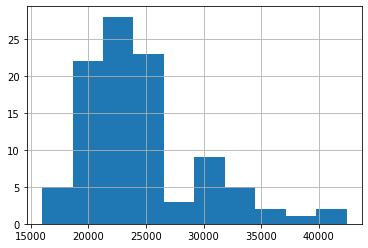

In [2]:
employees = pd.read_excel('data/employees.xls')
employees.SALARY.hist()

не очень нормальное

qq

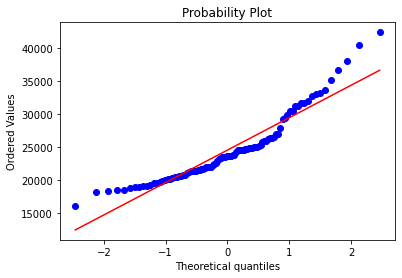

In [3]:
f = stats.probplot(employees.SALARY, dist="norm", plot = plt)

In [4]:
intervals = np.linspace(min(employees.SALARY), max(employees.SALARY),31)
expected = []
observed = []
std = np.std(employees.SALARY)
mu = np.mean(employees.SALARY)
for i in range(1,len(intervals)):
    observed.append(len(employees.SALARY[(employees.SALARY < intervals[i]) & (employees.SALARY >= intervals[i-1])]))
    expected.append((norm.cdf(intervals[i], mu, std) - norm.cdf(intervals[i-1], mu, std))*len(employees.SALARY))

chisquare(observed, expected, ddof = 2)

Power_divergenceResult(statistic=54.71904090529905, pvalue=0.0012413519039254275)

In [5]:
k2, p = stats.normaltest(employees.SALARY)
print("p = {:g}".format(p))
alpha = 0.01
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.86165e-06
The null hypothesis can be rejected


In [6]:
stats.shapiro(employees.SALARY)

ShapiroResult(statistic=0.9015016555786133, pvalue=1.6645467439957429e-06)

на Q-Q графике визуально, на основе хи-квадрат теста по 30 бакетам и по тесту D’Agostino and Pearson’s и по тесту Шапиро на 1% мы отвергаем гипотезу о нормальном распределении этой переменной

# Задание 3
Методом перебора найдите наиболее подходящий тип распределения
для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить
представление о форме плотности распределения. Затем изучите квантильные графики для разных
распределений. Если будет такая возможность, попробуйте применить какие-то критерии согласия.

<AxesSubplot:>

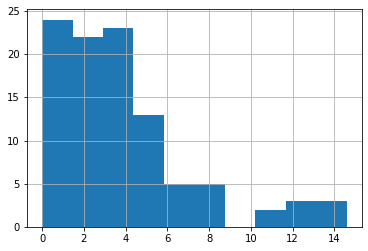

In [70]:
p3df = pd.read_csv('data/sample.csv')
p3df.Sample.hist()

### Нарисуем несколько распределений на QQ графике:

* нормальное
* лапласа
* экспоненциальное
* усеченное экспоненциальное
* логнормальное


In [71]:
def tester(data_column, distr):
    intervals = np.linspace(min(data_column), max(data_column),31)
    expected = []
    observed = []

    distr_params = distr.fit(data_column)
    for i in range(1,len(intervals)):
        observed.append(len(data_column[(data_column < intervals[i]) & (data_column >= intervals[i-1])]))
        expected.append((distr.cdf(intervals[i], *distr_params) - distr.cdf(intervals[i-1], *distr_params))*len(data_column))

    return(chisquare(observed, expected, ddof = 2))


Power_divergenceResult(statistic=117.14971094153768, pvalue=3.3600532147626343e-13)


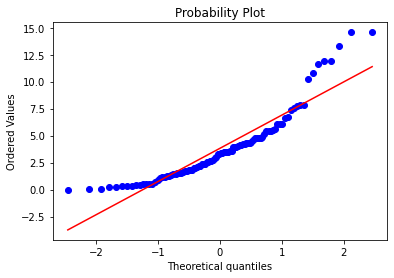

In [72]:
p = stats.probplot(p3df.Sample, dist="norm", plot = plt)
print(tester(p3df.Sample, norm))

Power_divergenceResult(statistic=91.83541388595273, pvalue=5.4116375173574415e-09)


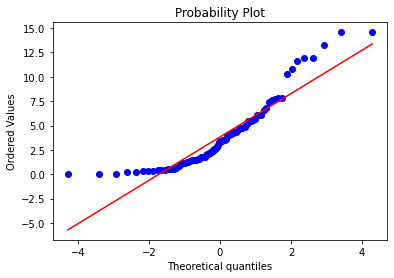

In [73]:
r = stats.probplot(p3df.Sample, dist=stats.laplace, plot = plt)
print(tester(p3df.Sample, stats.laplace))

In [74]:
loc1, scale1, s

(0.003851259279964574, 11.308348302140255, 0.6849685942539334)

Power_divergenceResult(statistic=48.49582004857258, pvalue=0.006755398417453978)


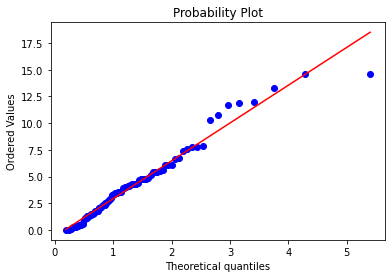

In [75]:
s, loc1, scale1 = stats.lognorm.fit(p3df.Sample)

r = stats.probplot(p3df.Sample, dist=stats.lognorm(s), plot = plt)
print(tester(p3df.Sample, stats.lognorm))

Power_divergenceResult(statistic=43.50646477710356, pvalue=0.02323759873740911)


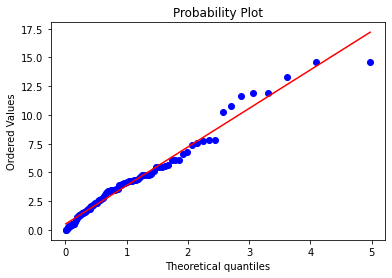

In [76]:
r = stats.probplot(p3df.Sample, dist=stats.expon, plot = plt)
print(tester(p3df.Sample, stats.expon))

Power_divergenceResult(statistic=54.11366770459223, pvalue=0.0014734639445013512)


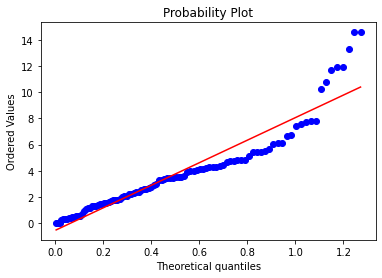

In [77]:
b1, loc1, scale1 = stats.truncexpon.fit(p3df.Sample)
r = stats.probplot(p3df.Sample, dist=stats.truncexpon(b=b1), plot = plt)
print(tester(p3df.Sample, stats.truncexpon))

### Вывод по типу распределений:
Для всех сделаем Хиквадрат тест, увидем, что на уровне значимости 1%, только для экспоненциального распределения не отвергается гипотеза о том, что выборка принадлежит этому распределению.